<a href="https://colab.research.google.com/github/EmoChat/EmoChat/blob/master/EmoChat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow.keras import *

In [2]:
import matplotlib.pylab as plt
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow_hub as hub
import tensorflow_datasets as tfds
from tqdm import tqdm
import cv2
from keras.preprocessing import image
import pathlib
import pandas as pd

In [ ]:
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [ ]:
batch_size = 32
img_height = 61
img_width = 61
IMG_SHAPE = (img_height, img_width, 3)
class_names = ["Disgusted", "Happy", "Neutral", "Angry", "Surprise"]

In [ ]:
train = pd.read_csv('emotion.csv', names=['File_name', 'Label'])

In [ ]:

train_image = [ ]

for i in tqdm(range(1, train.shape[0])):

  img = image.load_img('drive/My Drive/images/'+train['File_name'][i], target_size=(img_height,img_width,3), 
              grayscale=False)
  img = image.img_to_array(img)
  img = img/255
  train_image.append(img)

X = np.array(train_image)



100%|██████████| 224/224 [00:00<00:00, 587.04it/s]


In [ ]:
train_labels = train.Label.to_list()
train_labels = list(map(int, train_labels[1:]))

In [ ]:
VGG_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
VGG_model.trainable = False

In [ ]:
model = tf.keras.Sequential()
model.add(VGG_model)
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(5, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

[1, 2, 2, 3, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 4, 1, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
224
224
[[[0.         0.00392157 0.01568628]
  [0.         0.00392157 0.00784314]
  [0.00784314 0.01568628 0.01176471]
  ...
  [0.         0.         0.01960784]
  [0.         0.         0.01568628]
  [0.00392157 0.         0.00784314]]

 [[0.         0.00784314 0.01176471]
  [0.         0.00392157 0.        ]
  [0.02352941 0

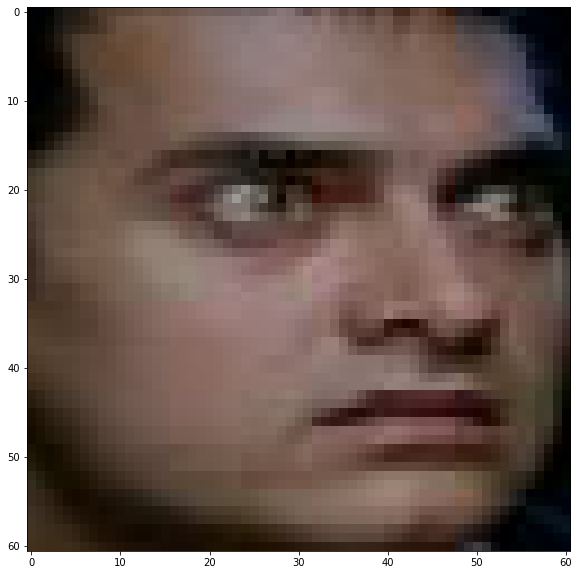

In [ ]:
print(train_labels)
print(len(train_labels))
print(len(train_image))
plt.figure(figsize=(10, 10))
img = train_image[3]
plt.imshow(img)
print(img)

In [ ]:
print(train_image)

In [ ]:
epochs = 20
features = np.array(train_image)
labels = np.array(train_labels)
history = model.fit(x=features,
                      y=labels,
                      batch_size=batch_size,
                      epochs=epochs)

Epoch 1/20
7/7 [==============================] - 6s 856ms/step - loss: 0.1996 - accuracy: 0.9375
Epoch 2/20
7/7 [==============================] - 6s 855ms/step - loss: 0.1576 - accuracy: 0.9598
Epoch 3/20
7/7 [==============================] - 6s 860ms/step - loss: 0.1488 - accuracy: 0.9643
Epoch 4/20
7/7 [==============================] - 6s 858ms/step - loss: 0.1029 - accuracy: 0.9732
Epoch 5/20
7/7 [==============================] - 6s 854ms/step - loss: 0.0908 - accuracy: 0.9821
Epoch 6/20
7/7 [==============================] - 6s 851ms/step - loss: 0.0689 - accuracy: 0.9866
Epoch 7/20
7/7 [==============================] - 6s 854ms/step - loss: 0.0620 - accuracy: 0.9821
Epoch 8/20
1/7 [===>..........................] - ETA: 0s - loss: 0.0550 - accuracy: 1.0000

KeyboardInterrupt: ignored

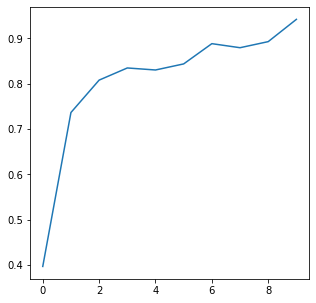

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'])

In [ ]:
pred = np.argmax(model.predict(features), axis=1)
print(pred)
true_pred = np.count_nonzero(pred == train_labels)
print(pred.shape)
total_pred = pred.shape[0]
print(np.count_nonzero(pred == train_labels))
print(true_pred/total_pred)


[1 0 2 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 1 1 4 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 3 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 1 1 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 1 0]
(224,)
217
0.96875
